## King County Housing (Model Selection)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from matplotlib.pyplot import plot 
pd.set_option('display.max_columns', None) #This option displays all the columns 


#########################
##House price prediction
#########################
kc_house_data = pd.read_csv(r'Datasets/kc_house_data/kc_house_data.csv')

#Get an idea on number of rows and columns
print(kc_house_data.shape)

#Print the column names
print(kc_house_data.columns)

#Print the column types
print(kc_house_data.dtypes)

(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
#Additional Details
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [7]:
#Summary
all_cols_summary=kc_house_data.describe()
print(round(all_cols_summary,2))

                 id       price  bedrooms  bathrooms  sqft_living    sqft_lot  \
count  2.161300e+04    21613.00  21613.00   21613.00     21613.00    21613.00   
mean   4.580302e+09   540088.14      3.37       2.11      2079.90    15106.97   
std    2.876566e+09   367127.20      0.93       0.77       918.44    41420.51   
min    1.000102e+06    75000.00      0.00       0.00       290.00      520.00   
25%    2.123049e+09   321950.00      3.00       1.75      1427.00     5040.00   
50%    3.904930e+09   450000.00      3.00       2.25      1910.00     7618.00   
75%    7.308900e+09   645000.00      4.00       2.50      2550.00    10688.00   
max    9.900000e+09  7700000.00     33.00       8.00     13540.00  1651359.00   

         floors  waterfront      view  condition     grade  sqft_above  \
count  21613.00    21613.00  21613.00   21613.00  21613.00    21613.00   
mean       1.49        0.01      0.23       3.41      7.66     1788.39   
std        0.54        0.09      0.77       0.65

In [8]:
#Model Building

#import statsmodels.formula.api as sm
#model1 = sm.ols(formula='price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15', data=kc_house_data)
#fitted1 = model1.fit()
#fitted1.summary()

#Defining X data
X = kc_house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = kc_house_data['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import sklearn 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X_train, y_train)

#Coefficients and Intercept
print(model_1.intercept_)
print(model_1.coef_)

#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model_1.predict(X_train)
print(metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model_1.predict(X_test)
print(metrics.r2_score(y_test,y_pred_test))

#RSquared
print("R-Squared on Train data : ", metrics.r2_score(y_train,y_pred_train))
print("R-Squared on Test data : ", metrics.r2_score(y_test,y_pred_test))

(17290, 18)
(17290,)
(4323, 18)
(4323,)
8080822.666092923
[-3.76187142e+04  4.39929752e+04  1.11927627e+02  1.12260521e-01
  7.86848634e+03  5.82851207e+05  5.24147307e+04  2.56475517e+04
  9.63780999e+04  7.02315647e+01  4.16960620e+01 -2.66443082e+03
  2.22630357e+01 -5.83768676e+02  6.04058556e+05 -2.04643130e+05
  1.84979337e+01 -3.70481687e-01]
0.7004310823997759
0.6964362880041324
R-Squared on Train data :  0.7004310823997759
R-Squared on Test data :  0.6964362880041324


In [9]:
#MAD
print("MAD on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)),2))
print("MAD on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)),2))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))

#RMSE
print("RMSE on Train data : ", round(math.sqrt(np.mean(np.abs(y_train - y_pred_train)**2)),2))
print("RMSE on Test data : ", round(math.sqrt(np.mean(np.abs(y_test - y_pred_test)**2)),2))

#describe price
round(kc_house_data.price.describe())

MAD on Train data :  125920.32
MAD on Test data :  126818.8
MAPE on Train data :  0.26
MAPE on Test data :  0.26
RMSE on Train data :  202295.52
RMSE on Test data :  196693.42


count      21613.0
mean      540088.0
std       367127.0
min        75000.0
25%       321950.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

## Credit Risk (Class Imbalance)

In [11]:
#########################
#Credit Risk Data
##########################
import pandas as pd
credit_risk_data = pd.read_csv(r'Datasets/loans_data/credit_risk_data_v1.csv')

#Get an idea on number of rows and columns
print(credit_risk_data.shape)

#Print the column names
print(credit_risk_data.columns)

(150008, 10)
Index(['Cust_num', 'Bad', 'Credit_Limit', 'Late_Payments_Count',
       'Card_Utilization_Percent', 'Age', 'Debt_to_income_ratio',
       'Monthly_Income', 'Num_loans_personal_loans', 'Family_dependents'],
      dtype='object')
Cust_num                      int64
Bad                           int64
Credit_Limit                  int64
Late_Payments_Count           int64
Card_Utilization_Percent    float64
Age                           int64
Debt_to_income_ratio        float64
Monthly_Income                int64
Num_loans_personal_loans      int64
Family_dependents             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 10 columns):
Cust_num                    150008 non-null int64
Bad                         150008 non-null int64
Credit_Limit                150008 non-null int64
Late_Payments_Count         150008 non-null int64
Card_Utilization_Percent    150008 non-null float64
Age                   

In [12]:
#Print the column types
print(credit_risk_data.dtypes)

#Additional Details
credit_risk_data.info()

Cust_num                      int64
Bad                           int64
Credit_Limit                  int64
Late_Payments_Count           int64
Card_Utilization_Percent    float64
Age                           int64
Debt_to_income_ratio        float64
Monthly_Income                int64
Num_loans_personal_loans      int64
Family_dependents             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 10 columns):
Cust_num                    150008 non-null int64
Bad                         150008 non-null int64
Credit_Limit                150008 non-null int64
Late_Payments_Count         150008 non-null int64
Card_Utilization_Percent    150008 non-null float64
Age                         150008 non-null int64
Debt_to_income_ratio        150008 non-null float64
Monthly_Income              150008 non-null int64
Num_loans_personal_loans    150008 non-null int64
Family_dependents           150008 non-null int64
dtypes: flo

In [13]:
#Summary
pd.set_option('display.max_columns', None) #This option displays all the columns 

all_cols_summary=credit_risk_data.describe()
print(round(all_cols_summary,2))

        Cust_num        Bad  Credit_Limit  Late_Payments_Count  \
count  150008.00  150008.00     150008.00            150008.00   
mean    75004.50       0.07       6311.85                 0.26   
std     43303.72       0.25       5221.25                 0.74   
min         1.00       0.00        100.00                 0.00   
25%     37502.75       0.00       4000.00                 0.00   
50%     75004.50       0.00       4900.00                 0.00   
75%    112506.25       0.00       7400.00                 0.00   
max    150008.00       1.00     100000.00                13.00   

       Card_Utilization_Percent        Age  Debt_to_income_ratio  \
count                 150008.00  150008.00             150008.00   
mean                      30.38      52.30                  0.30   
std                       33.41      14.77                  0.20   
min                        0.00      21.00                  0.00   
25%                        3.00      41.00                  0.18 

In [14]:
#Defining X data
X = credit_risk_data[['Credit_Limit', 'Late_Payments_Count',
       'Card_Utilization_Percent', 'Age', 'Debt_to_income_ratio',
       'Monthly_Income', 'Num_loans_personal_loans', 'Family_dependents']]

y = credit_risk_data['Bad']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120006, 8)
(120006,)
(30002, 8)
(30002,)


In [16]:
#Building the model
from sklearn.linear_model import LogisticRegression
model_2= LogisticRegression(solver="lbfgs")
model_2.fit(X_train,y_train)

#Coefficients and Intercept
print(model_2.intercept_)
print(model_2.coef_)

##Confusion Matrix Calculation on Train data
from sklearn.metrics import confusion_matrix

y_pred_train=model_2.predict(X_train)
cm1 = confusion_matrix(y_train,y_pred_train)
print(cm1)

##Accuracy on Train data
accuracy1=(cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
print(accuracy1)

[-0.12910983]
[[-9.88263399e-05  6.44961715e-01  1.07039321e-02 -5.95174656e-02
  -3.06946771e-03  1.23632855e-05  1.22022632e-01  4.07276576e-02]]
[[111264    650]
 [  7465    627]]
0.932378381080946


In [17]:
##Confusion matrix on test data
y_pred_test=model_2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred_test)
print(cm2)

#####Accuracy on Test data
accuracy2=(cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1])
print(accuracy2)

[[27920   147]
 [ 1806   129]]
0.934904339710686


In [19]:
#Frequency of target variable
credit_risk_data['Bad'].value_counts()

0    139981
1     10027
Name: Bad, dtype: int64

In [20]:
##Sensitivity on train data
Sensitivity1=cm1[0,0]/(cm1[0,0]+cm1[0,1])
print(round(Sensitivity1,3))

##Specificity on train data
Specificity1=cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(round(Specificity1,3))


##Sensitivity on test data
Sensitivity2=cm2[0,0]/(cm2[0,0]+cm2[0,1])
print(round(Sensitivity2,3))

##Specificity on test data
Specificity2=cm2[1,1]/(cm2[1,0]+cm2[1,1])
print(round(Specificity2,3))

0.994
0.077
0.995
0.067


In [21]:
#####Probability predictions
y_pred_prob=model_2.predict_proba(X_train)
print(y_pred_prob.shape)
print(y_pred_prob)
print(y_pred_prob[0,])
print(y_pred_prob[0,0])
print(y_pred_prob[0,1])
print(y_pred_prob[0:5,1])
print(y_pred_prob[:,1])

y_pred_prob_1=y_pred_prob[:,1]

## Default Threshold 0.5
threshold=0.5
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1
print(y_pred_class)

(120006, 2)
[[0.96335721 0.03664279]
 [0.93137998 0.06862002]
 [0.74254992 0.25745008]
 ...
 [0.94355761 0.05644239]
 [0.93345083 0.06654917]
 [0.990986   0.009014  ]]
[0.96335721 0.03664279]
0.9633572076485523
0.03664279235144777
[0.03664279 0.06862002 0.25745008 0.04251289 0.07394385]
[0.03664279 0.06862002 0.25745008 ... 0.05644239 0.06654917 0.009014  ]
[0. 0. 0. ... 0. 0. 0.]


In [22]:
##Confusion Matrix and accuracy
cm3 = confusion_matrix(y_train,y_pred_class)
print("confusion Matrix with Threshold ",  threshold,  "\n",cm3)
accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print("Accuracy is ", round(accuracy3,3))

##Sensitivity and Specificity on Train data
Sensitivity3=cm3[0,0]/(cm3[0,0]+cm3[0,1])
print("Sensitivity is", round(Sensitivity3,3))

Specificity3=cm3[1,1]/(cm3[1,0]+cm3[1,1])
print("Specificity is ", round(Specificity3,3))

confusion Matrix with Threshold  0.5 
 [[111264    650]
 [  7465    627]]
Accuracy is  0.932
Sensitivity is 0.994
Specificity is  0.077


In [23]:
## New Threshold 0.2
threshold=0.2
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1

##Confusion Matrix and accuracy
cm3 = confusion_matrix(y_train,y_pred_class)
print("confusion Matrix with Threshold ",  threshold,  "\n",cm3)
accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print("Accuracy is ", round(accuracy3,3))

##Sensitivity and Specificity on Train data
Sensitivity3=cm3[0,0]/(cm3[0,0]+cm3[0,1])
print("Sensitivity is", round(Sensitivity3,3))

Specificity3=cm3[1,1]/(cm3[1,0]+cm3[1,1])
print("Specificity is ", round(Specificity3,3))

confusion Matrix with Threshold  0.2 
 [[104697   7217]
 [  5389   2703]]
Accuracy is  0.895
Sensitivity is 0.936
Specificity is  0.334


In [24]:
## New Threshold 0.1
threshold=0.1
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1

##Confusion Matrix and accuracy
cm3 = confusion_matrix(y_train,y_pred_class)
print("confusion Matrix with Threshold ",  threshold,  "\n",cm3)
accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print("Accuracy is ", round(accuracy3,3))

##Sensitivity and Specificity on Train data
Sensitivity3=cm3[0,0]/(cm3[0,0]+cm3[0,1])
print("Sensitivity is", round(Sensitivity3,3))

Specificity3=cm3[1,1]/(cm3[1,0]+cm3[1,1])
print("Specificity is ", round(Specificity3,3))

confusion Matrix with Threshold  0.1 
 [[89538 22376]
 [ 3294  4798]]
Accuracy is  0.786
Sensitivity is 0.8
Specificity is  0.593


In [25]:
####################
#####ROC AUC
####################

## New Threshold 0.1
threshold=0.01
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1

##Confusion Matrix and accuracy
cm3 = confusion_matrix(y_train,y_pred_class)
print("confusion Matrix with Threshold ",  threshold,  "\n",cm3)
accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print("Accuracy is ", round(accuracy3,3))

##Sensitivity and Specificity on Train data
Sensitivity3=cm3[0,0]/(cm3[0,0]+cm3[0,1])
print("Sensitivity is", round(Sensitivity3,3))

Specificity3=cm3[1,1]/(cm3[1,0]+cm3[1,1])
print("Specificity is ", round(Specificity3,3))

confusion Matrix with Threshold  0.01 
 [[14646 97268]
 [  179  7913]]
Accuracy is  0.188
Sensitivity is 0.131
Specificity is  0.978


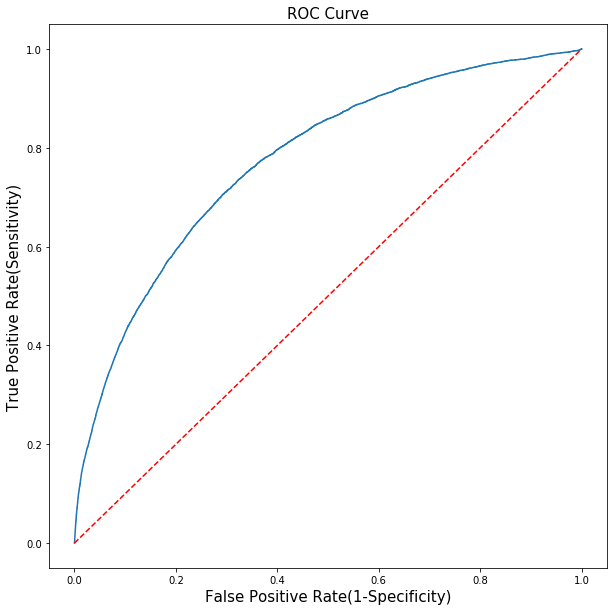

0.7749200071190178


In [28]:
##ROC Curve Creation
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_prob_1)
plt.figure(figsize=(10,10))
plt.title('ROC Curve',fontsize=15)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)',fontsize=15)
plt.xlabel('False Positive Rate(1-Specificity)',fontsize=15)
plt.show()
###Area under Curve-AUC
auc = auc(false_positive_rate, true_positive_rate)
print(auc)

In [29]:
##F1 Score
from sklearn.metrics import f1_score

## Threshold 0.5
threshold=0.5
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1
print("threshold=0.5 f1_score ",f1_score(y_train, y_pred_class))

## Threshold 0.2
threshold=0.2
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1
print("threshold=0.2 f1_score ",f1_score(y_train, y_pred_class))

threshold=0.5 f1_score  0.13384566122318287
threshold=0.2 f1_score  0.30013324450366424


## Pima Diabetes (Cross Validation)

In [30]:
########################
####Cross-Validation
########################

###Test data cross-validation

diabetes_data= pd.read_csv(r'Datasets/pima/diabetes.csv')

#Get an idea on number of rows and columns
print(diabetes_data.shape)

#Print the column names
print(diabetes_data.columns)

#Print the column types
print(diabetes_data.dtypes)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [31]:
#Additional Details
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
#Summary
pd.set_option('display.max_columns', None) #This option displays all the columns 

all_cols_summary=diabetes_data.describe()
print(round(all_cols_summary,2))

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24     0.35  
std                        0.33   11.76     0.48  
min                        0.08   21.00     0.00  
25%                        0.24   24.00   

In [33]:
#Defining X data
X = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = diabetes_data[['Outcome']]

#Train and Test data creation
from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614, 1)
(154, 8)
(154, 1)


In [34]:
## Model Building 
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1= DecisionTreeClassifier()
diabetes_tree1.fit(X_train, y_train)

#Calculate Accuracy on Train and Test data
print("Max Depth = None")
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Test data Accuracy", diabetes_tree1.score(X_test, y_test))

Max Depth = None
Train data Accuracy 1.0
Test data Accuracy 0.7142857142857143


In [35]:
## Model Building with pruning parameters
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1= DecisionTreeClassifier(max_depth=1)
diabetes_tree1.fit(X_train, y_train)

#Calculate Accuracy on Train and Test data
print("Max Depth = 1")
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Test data Accuracy", diabetes_tree1.score(X_test, y_test))

Max Depth = 1
Train data Accuracy 0.742671009771987
Test data Accuracy 0.7077922077922078


In [36]:
## Model Building with pruning parameters
print("Max Depth = 6")
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1= DecisionTreeClassifier(max_depth=5)
diabetes_tree1.fit(X_train, y_train)

#Calculate Accuracy on Train and Test data
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Test data Accuracy", diabetes_tree1.score(X_test, y_test))

Max Depth = 6
Train data Accuracy 0.8583061889250815
Test data Accuracy 0.6883116883116883


In [38]:
## Model Building with pruning parameters
print("Max Depth = 3")
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1= DecisionTreeClassifier(max_depth=3)
diabetes_tree1.fit(X_train, y_train)

#Calculate Accuracy on Train and Test data
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Test data Accuracy", diabetes_tree1.score(X_test, y_test))

Max Depth = 3
Train data Accuracy 0.7817589576547231
Test data Accuracy 0.7402597402597403


In [39]:
## Model Building with pruning parameters
print("Max Depth = 2")
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1= DecisionTreeClassifier(max_depth=2)
diabetes_tree1.fit(X_train, y_train)

#Calculate Accuracy on Train and Test data
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Test data Accuracy", diabetes_tree1.score(X_test, y_test))

Max Depth = 2
Train data Accuracy 0.7785016286644951
Test data Accuracy 0.7467532467532467


In [40]:
####K-fold cross-validation
diabetes_tree_KF = DecisionTreeClassifier(max_depth=3)
#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

## Checking the accuracy of model on 10-folds
from sklearn import model_selection
acc10 = model_selection.cross_val_score(diabetes_tree_KF,X, y,cv=kfold)
print(acc10)
print(acc10.mean())

[0.67532468 0.77922078 0.7012987  0.64935065 0.77922078 0.81818182
 0.83116883 0.83116883 0.67105263 0.71052632]
0.7446514012303486


In [41]:
#### Train – Validation – Holdout cross-validation
from sklearn  import model_selection

## Split overall data into Train and Test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.3, random_state=99)

## Split Test data into Validation and Holdout data split
X_val, X_hold, y_val, y_hold = model_selection.train_test_split(X_test, y_test ,test_size=0.5 , random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_hold.shape)
print(y_hold.shape)

(537, 8)
(537, 1)
(115, 8)
(115, 1)
(116, 8)
(116, 1)


In [42]:
## Model Building with pruning parameters
print("Max Depth 6")
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1= DecisionTreeClassifier(max_depth=6)
diabetes_tree1.fit(X_train, y_train)

#Calculate Accuracy on Train and Test data
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Validation data Accuracy", diabetes_tree1.score(X_val, y_val))


## Model Building with pruning parameters
print("Max Depth 1")
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1= DecisionTreeClassifier(max_depth=1)
diabetes_tree1.fit(X_train, y_train)

#Calculate Accuracy on Train and Test data
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Validation data Accuracy", diabetes_tree1.score(X_val, y_val))


## Model Building with pruning parameters
print("Max Depth 3")
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1= DecisionTreeClassifier(max_depth=3)
diabetes_tree1.fit(X_train, y_train)

#Calculate Accuracy on Train and Test data
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Validation data Accuracy", diabetes_tree1.score(X_val, y_val))

#Final Model and Result
print("Max Depth 3")
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Validation data Accuracy", diabetes_tree1.score(X_val, y_val))
print("Holdout data Accuracy", diabetes_tree1.score(X_hold, y_hold))

Max Depth 6
Train data Accuracy 0.8957169459962756
Validation data Accuracy 0.6869565217391305
Max Depth 1
Train data Accuracy 0.7411545623836127
Validation data Accuracy 0.6869565217391305
Max Depth 3
Train data Accuracy 0.7746741154562383
Validation data Accuracy 0.7304347826086957
Max Depth 3
Train data Accuracy 0.7746741154562383
Validation data Accuracy 0.7304347826086957
Holdout data Accuracy 0.7758620689655172


In [43]:
###Grid Search

from sklearn.model_selection import GridSearchCV
grid_param={'max_depth': range(1,10,1), 'max_leaf_nodes': range(2,30,1)}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,grid_param)
clf.fit(X_train,y_train)

# examine the best model

# Single best score achieved across all params (min_samples_split)
print(clf.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(clf.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(clf.best_estimator_)

grid_result_tree= clf.best_estimator_
print("Train data Accuracy", grid_result_tree.score(X_train, y_train))
print("Validation data Accuracy", grid_result_tree.score(X_val, y_val))

0.7615610938040845
{'max_depth': 7, 'max_leaf_nodes': 19}
DecisionTreeClassifier(max_depth=7, max_leaf_nodes=19)
Train data Accuracy 0.8547486033519553
Validation data Accuracy 0.7304347826086957


In [44]:
##########################
##Feature Engineering Tips and Tricks
############################

#Defining X data
X = kc_house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = kc_house_data['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import sklearn 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X_train, y_train)

#Coefficients and Intercept
print(model_1.intercept_)
print(model_1.coef_)

#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model_1.predict(X_train)
print(metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model_1.predict(X_test)
print(metrics.r2_score(y_test,y_pred_test))

#RMSE
print("RMSE on Train data : ", round(math.sqrt(np.mean(np.abs(y_train - y_pred_train)**2)),2))
print("RMSE on Test data : ", round(math.sqrt(np.mean(np.abs(y_test - y_pred_test)**2)),2))

(17290, 18)
(17290,)
(4323, 18)
(4323,)
8080822.666092923
[-3.76187142e+04  4.39929752e+04  1.11927627e+02  1.12260521e-01
  7.86848634e+03  5.82851207e+05  5.24147307e+04  2.56475517e+04
  9.63780999e+04  7.02315647e+01  4.16960620e+01 -2.66443082e+03
  2.22630357e+01 -5.83768676e+02  6.04058556e+05 -2.04643130e+05
  1.84979337e+01 -3.70481687e-01]
0.7004310823997759
0.6964362880041324
RMSE on Train data :  202295.52
RMSE on Test data :  196693.42


Text(0.5, 1.0, 'Bedrooms vs House Price')

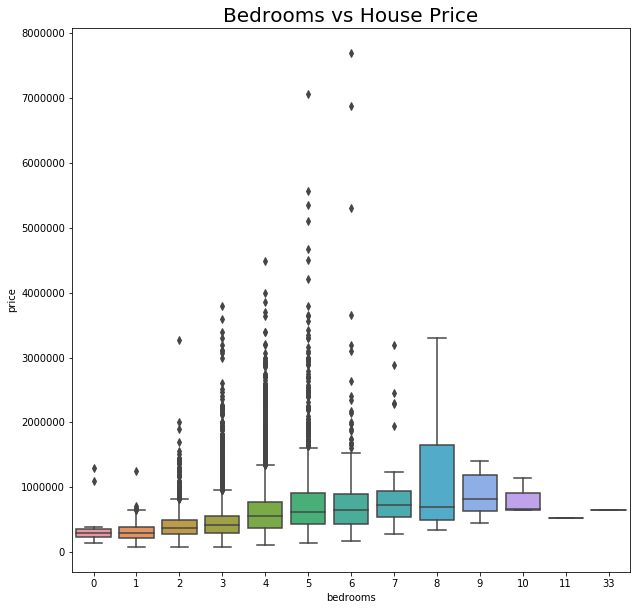

In [46]:
###The Dummy Variable 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_data["bedrooms"],y=kc_house_data["price"])
plt.title('Bedrooms vs House Price', fontsize=20)

Text(0.5, 1.0, 'Bathrooms vs House Price')

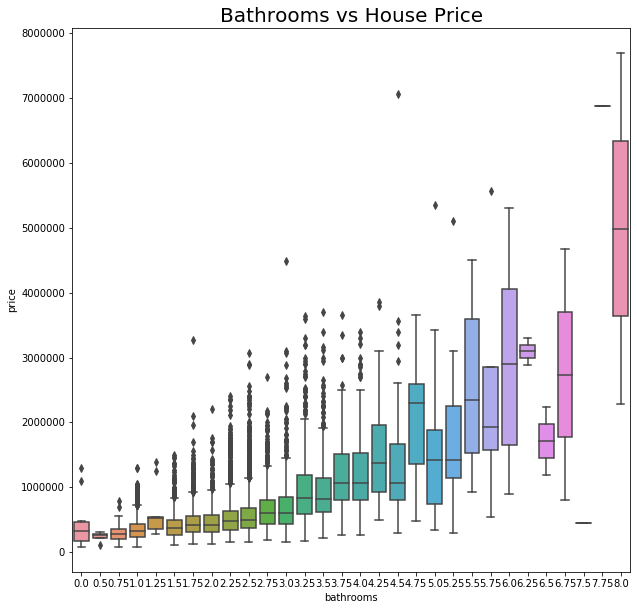

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_data["bathrooms"],y=kc_house_data["price"])
plt.title('Bathrooms vs House Price', fontsize=20)

Text(0.5, 1.0, 'Floors vs House Price')

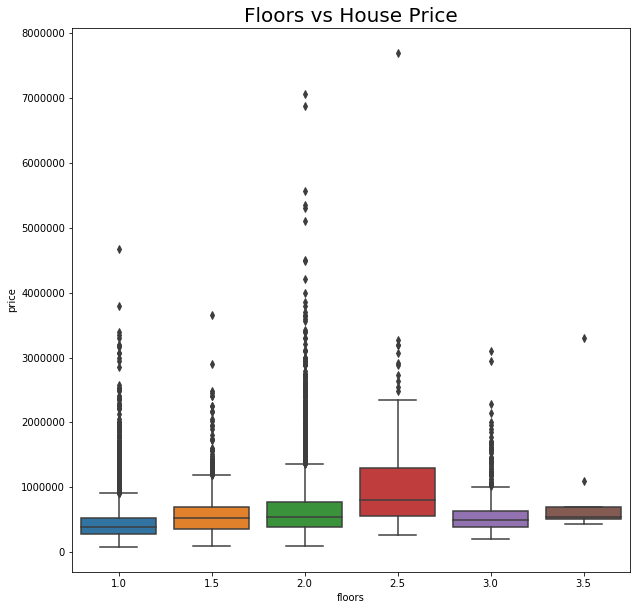

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_data["floors"],y=kc_house_data["price"])
plt.title('Floors vs House Price', fontsize=20)

Text(0.5, 1.0, 'Waterfront vs House Price')

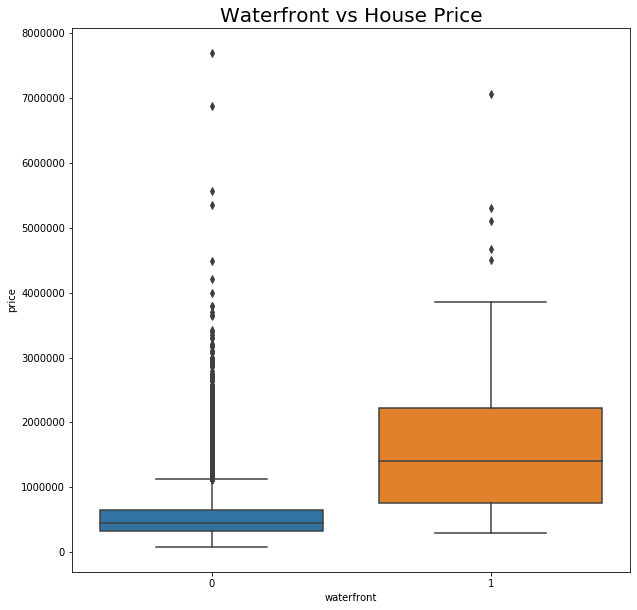

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_data["waterfront"],y=kc_house_data["price"])
plt.title('Waterfront vs House Price', fontsize=20)

Text(0.5, 1.0, 'View vs House Price')

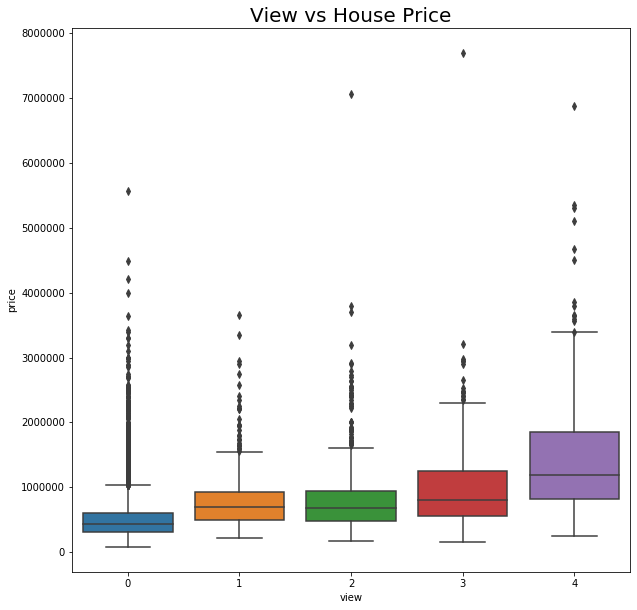

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_data["view"],y=kc_house_data["price"])
plt.title('View vs House Price', fontsize=20)

Text(0.5, 1.0, 'Condition vs House Price')

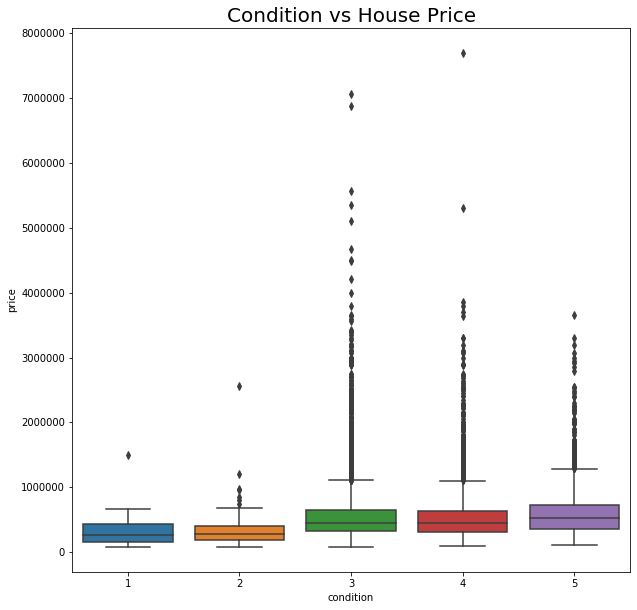

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_data["condition"],y=kc_house_data["price"])
plt.title('Condition vs House Price', fontsize=20)

Text(0.5, 1.0, 'Grade vs House Price')

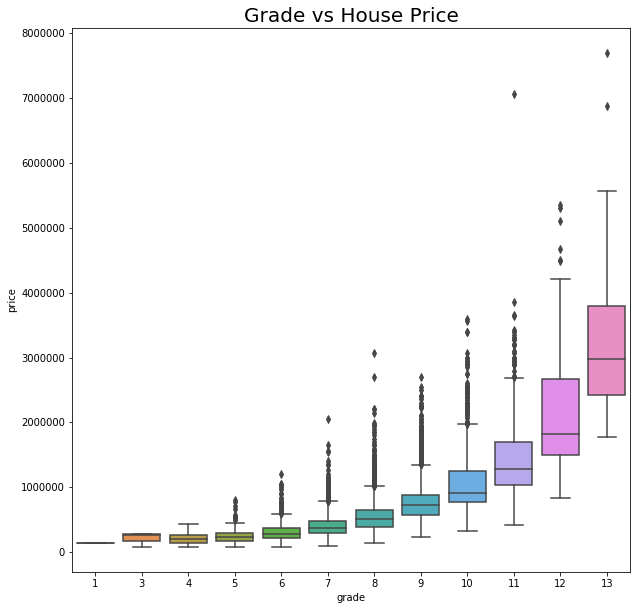

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_data["grade"],y=kc_house_data["price"])
plt.title('Grade vs House Price', fontsize=20)

Text(0.5, 1.0, 'Zipcode vs House Price')

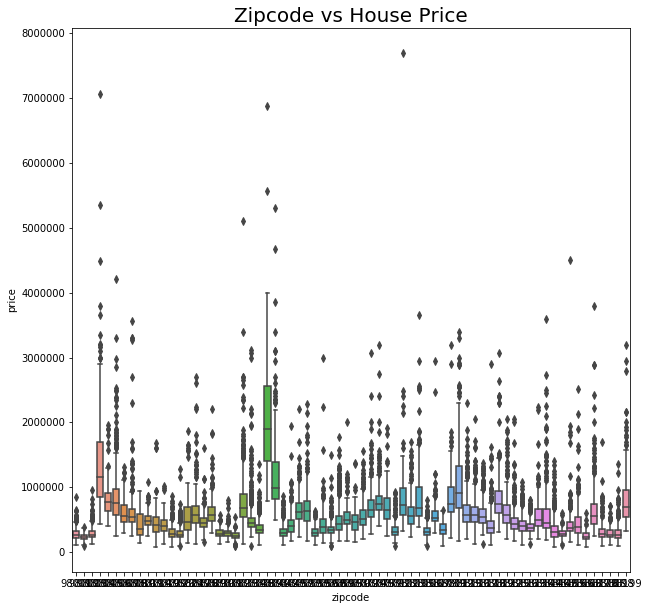

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_data["zipcode"],y=kc_house_data["price"])
plt.title('Zipcode vs House Price', fontsize=20)

In [57]:
###The Dummy Variable Creation

print(kc_house_data.shape)
categorical_vars=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

from sklearn.preprocessing import OneHotEncoder
encoding=OneHotEncoder()
encoding.fit(kc_house_data[categorical_vars])
onehotlabels = encoding.transform(kc_house_data[categorical_vars]).toarray()
onehotlabels_data=pd.DataFrame(onehotlabels)

print(kc_house_data.shape)

kc_house_data1 = kc_house_data.drop(categorical_vars,axis = 1)
print(kc_house_data1.shape)

kc_house_data_onehot=kc_house_data1.join(onehotlabels_data)
print(kc_house_data_onehot.shape)

(21613, 21)
(21613, 21)
(21613, 13)
(21613, 156)


In [59]:
###Model buiding with one hot encoded data

#Defining X data
col_names = kc_house_data_onehot.columns.values
print(col_names)

x_col_names=col_names[3:]
print(x_col_names)

X = kc_house_data_onehot[x_col_names]
y = kc_house_data_onehot['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

['id' 'date' 'price' 'sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15' 0 1 2
 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77
 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142]
['sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15' 0 1 2 3 4 5 6 7
 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 81 82 83 84 85 86 87 88 8

In [60]:
import sklearn 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X_train, y_train)

#Coefficients and Intercept
print(model_1.intercept_)
print(model_1.coef_)

#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model_1.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model_1.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#RMSE
print("RMSE on Train data : ", round(math.sqrt(np.mean(np.abs(y_train - y_pred_train)**2)),2))
print("RMSE on Test data : ", round(math.sqrt(np.mean(np.abs(y_test - y_pred_test)**2)),2))

-31087000.617367852
[ 8.90151475e+01  2.36015153e-01  6.39305726e+01  2.50845842e+01
 -7.82819412e+01  3.34654085e+01  2.03369679e+05 -1.84408071e+05
  2.27910273e+01 -1.43600923e-01  5.01238817e+04  4.09233921e+04
  5.51425929e+04  6.26636368e+04  4.73698976e+04  2.82327335e+04
 -9.22096913e+03 -1.41573863e+05 -3.74603417e+04 -4.37691945e+04
 -1.13822666e+05 -2.53833436e+04  8.67742431e+04 -2.35486531e+05
 -2.47030969e+05 -2.36903786e+05 -2.15458982e+05 -2.54258547e+05
 -2.25771629e+05 -2.29682147e+05 -2.26636149e+05 -2.11794076e+05
 -2.21365196e+05 -2.24719752e+05 -2.00965141e+05 -1.66169207e+05
 -1.98431361e+05 -1.41886556e+05 -9.90126463e+04 -3.37666116e+04
 -9.82645827e+04  2.30685007e+05  2.04529336e+03  4.61006734e+04
 -7.02288350e+04  7.79388036e+03  2.06895245e+05  2.36019072e+05
 -1.64102382e+05  1.16507672e+05 -5.17939436e+05  2.14576992e+06
  1.22805776e+06  1.65873810e+04  1.21304291e+04 -5.66855465e+03
  9.68395945e+04 -5.93453059e+04 -6.05435442e+04 -2.89219976e+05
  2.8

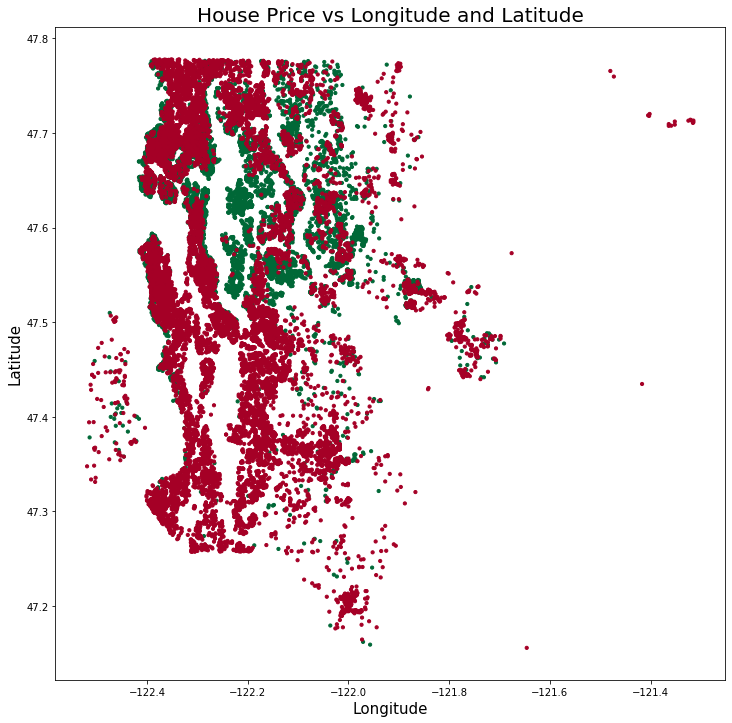

In [61]:
### Handling Longitude and Latitude

###'House Price vs Longitude and Latitude'
bubble_col= kc_house_data["price"] > kc_house_data["price"].quantile(0.7)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(kc_house_data["long"],kc_house_data["lat"], c=bubble_col,cmap="RdYlGn",s=10)
plt.title('House Price vs Longitude and Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()

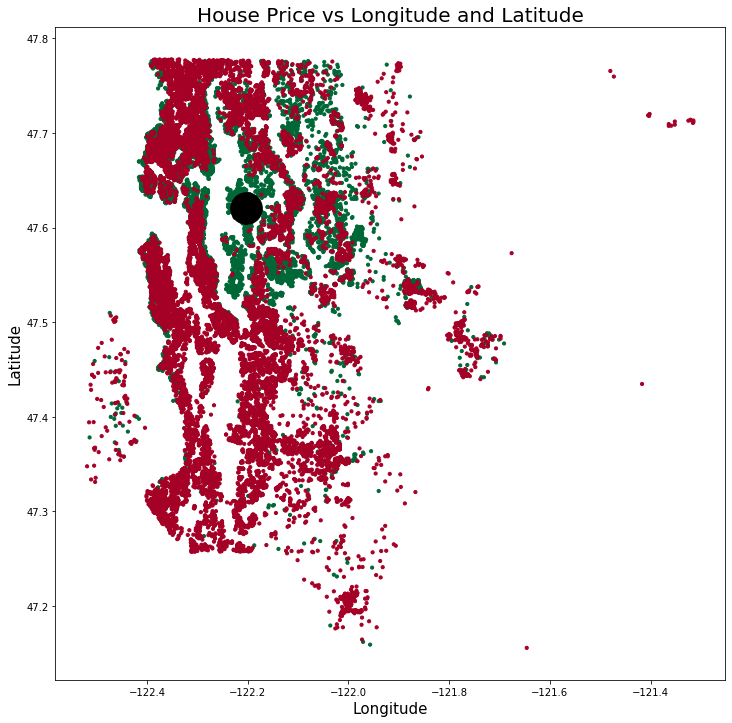

In [62]:
# Lets take the center of all high priced houses and low priced houses

high_long_mean=kc_house_data["long"][bubble_col].mean()
high_lat_mean=kc_house_data["lat"][bubble_col].mean()


import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(kc_house_data["long"],kc_house_data["lat"], c=bubble_col,cmap="RdYlGn",s=10)
plt.scatter(high_long_mean,high_lat_mean, c="black", s=1000)
plt.title('House Price vs Longitude and Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()

Text(0, 0.5, 'log(house price)')

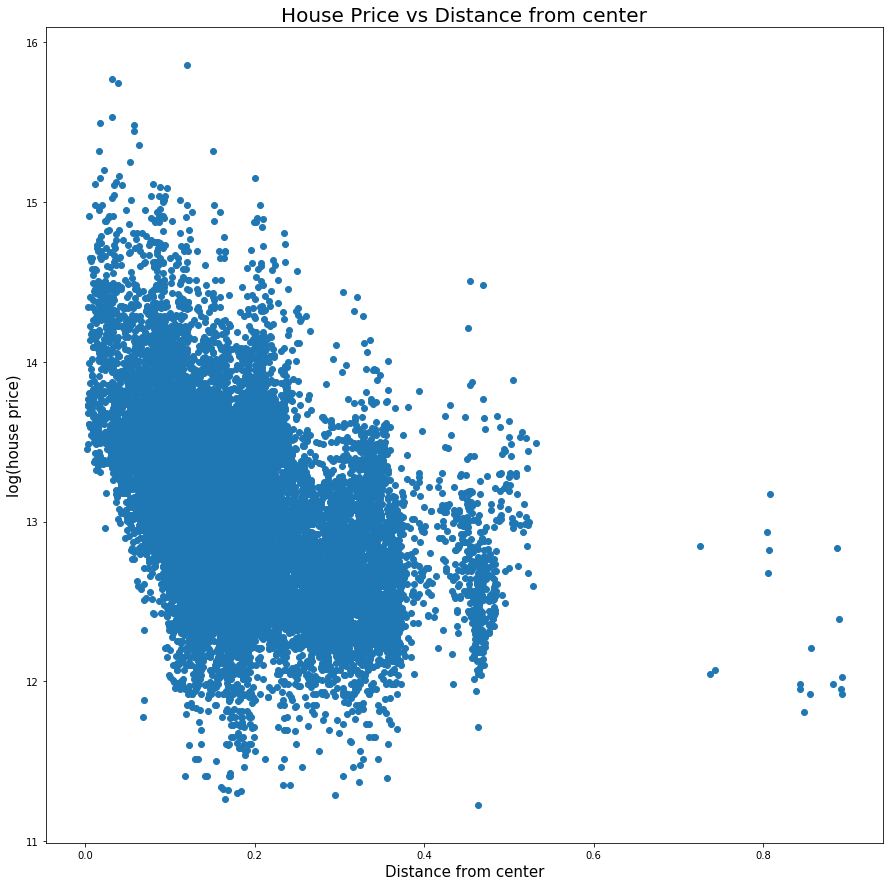

In [63]:
##Distance from center to every house
kc_house_data["High_cen_distance"]=np.sqrt((kc_house_data["long"] - high_long_mean) ** 2 + (kc_house_data["lat"] - high_lat_mean) ** 2)

plt.figure(figsize=(15,15))
plt.scatter(kc_house_data["High_cen_distance"],np.log(kc_house_data["price"]))
plt.title('House Price vs Distance from center', fontsize=20)
plt.xlabel('Distance from center', fontsize=15)
plt.ylabel('log(house price)', fontsize=15)

In [64]:
#Defining X data
col_names = kc_house_data.columns.values
print(col_names)

x_col_names=col_names[3:]
print(x_col_names)

X = kc_house_data[x_col_names]
y = kc_house_data['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'High_cen_distance']
['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'High_cen_distance']
(17290, 19)
(17290,)
(4323, 19)
(4323,)


In [65]:
import sklearn 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X_train, y_train)

#Coefficients and Intercept
print(model_1.intercept_)
print(model_1.coef_)

#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model_1.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model_1.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#RMSE
print("RMSE on Train data : ", round(math.sqrt(np.mean(np.abs(y_train - y_pred_train)**2)),2))
print("RMSE on Test data : ", round(math.sqrt(np.mean(np.abs(y_test - y_pred_test)**2)),2))

16050500.066832354
[-4.07177587e+04  4.28493530e+04  1.12046901e+02  1.84739444e-01
  1.14172820e+04  5.71183522e+05  5.67639485e+04  2.37351427e+04
  9.21438138e+04  7.32631285e+01  3.87837722e+01 -2.49562227e+03
  2.23767740e+01 -3.69503855e+02  3.34885890e+05 -7.10552538e+04
  5.86381597e+00 -1.44732209e-01 -6.84690709e+05]
Train data R-Squared :  0.7148088489464937
Test data R-Squared :  0.7090610925034835
RMSE on Train data :  197381.26
RMSE on Test data :  192559.88


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'High_cen_distance'],
      dtype='object')


/Users/shuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/shuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/shuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Text(0.5, 1.0, 'Sale_year vs House Price')

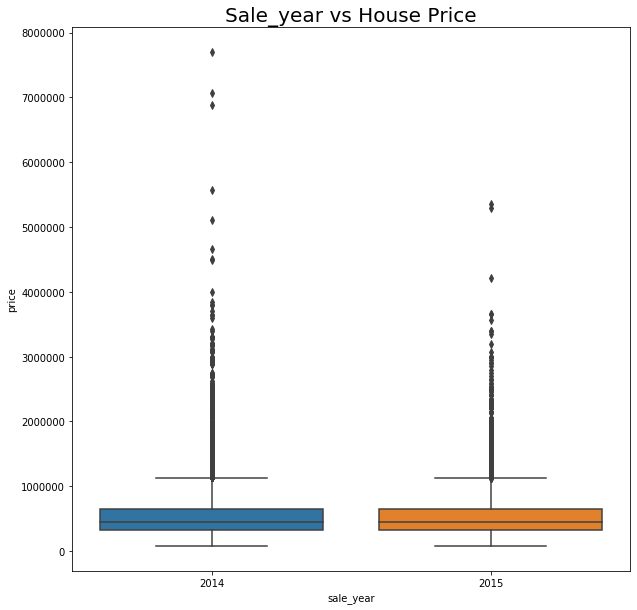

In [66]:
###############################
##5.7.3 Handling date variables
###############################

#Print the column names
print(kc_house_data.columns)
date_vars = ['date', 'yr_built', 'yr_renovated']
kc_house_dates=kc_house_data[date_vars]
kc_house_dates.head()

kc_house_dates['sale_year'] = np.int64([d[0:4] for d in kc_house_dates["date"]])
kc_house_dates['sale_month'] = np.int64([d[4:6] for d in kc_house_dates["date"]])
kc_house_dates['day_sold'] = np.int64([d[6:8] for d in kc_house_dates["date"]])
kc_house_dates['age_of_house'] = kc_house_dates['sale_year'] - kc_house_dates['yr_built']
kc_house_dates['Ind_renovated'] = kc_house_dates['yr_renovated']>0

plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_dates['sale_year'],y=kc_house_data["price"])
plt.title('Sale_year vs House Price', fontsize=20)

Text(0.5, 1.0, 'Sale_month vs House Price')

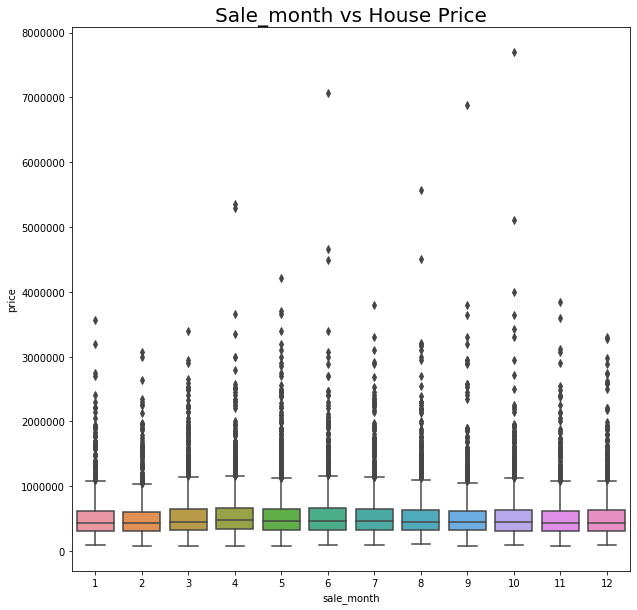

In [67]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_dates['sale_month'],y=kc_house_data["price"])
plt.title('Sale_month vs House Price', fontsize=20)

Text(0.5, 1.0, 'Day_sold vs House Price')

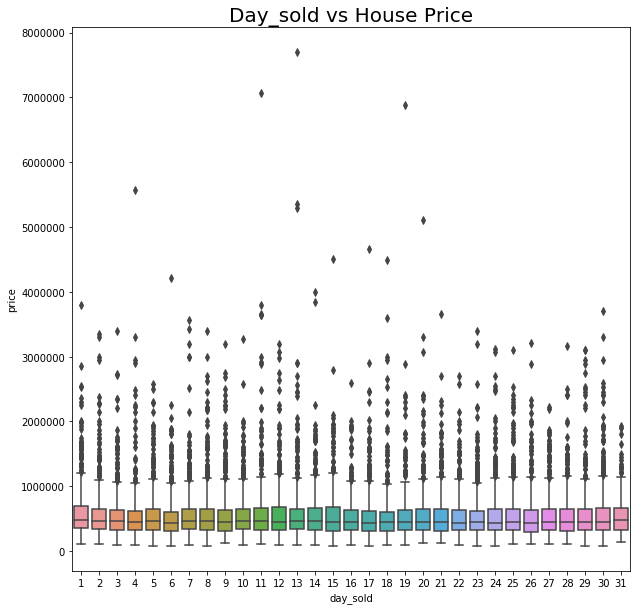

In [68]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_dates['day_sold'],y=kc_house_data["price"])
plt.title('Day_sold vs House Price', fontsize=20)

Text(0.5, 1.0, 'Age_of_house vs House Price')

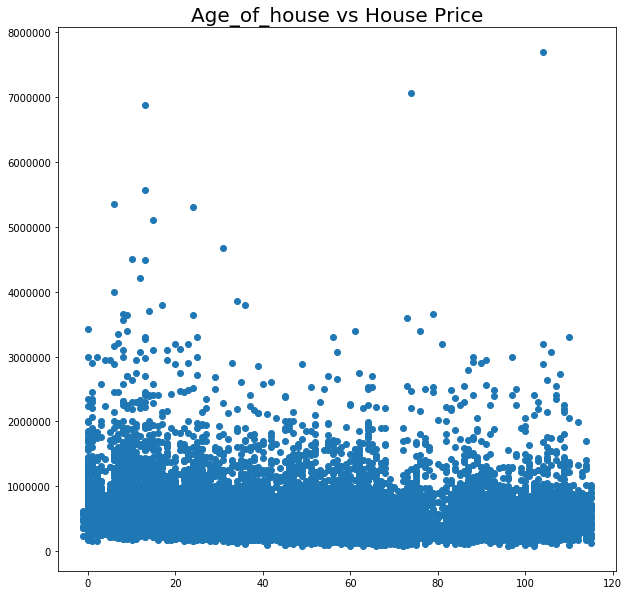

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(kc_house_dates["age_of_house"],kc_house_data["price"])
plt.title('Age_of_house vs House Price', fontsize=20)

Text(0.5, 1.0, 'Ind_renovated vs House Price')

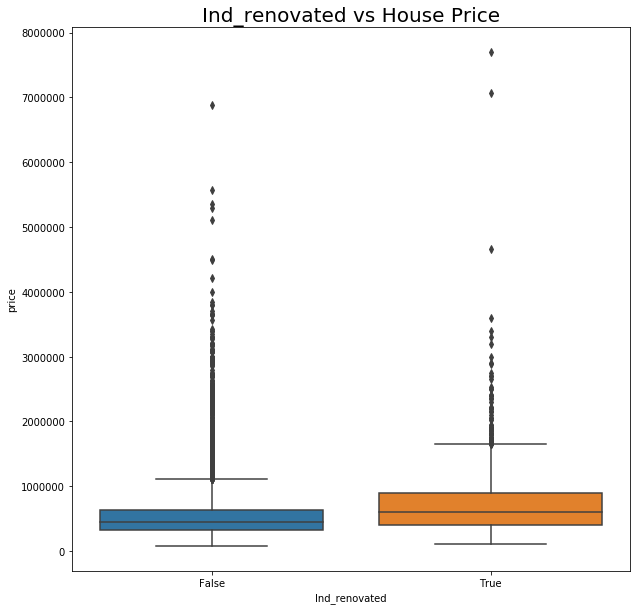

In [70]:
plt.figure(figsize=(10,10))
sns.boxplot( x=kc_house_dates['Ind_renovated'],y=kc_house_data["price"])
plt.title('Ind_renovated vs House Price', fontsize=20)

In [72]:
##Model building with date variables 
kc_house_dates1=kc_house_dates.drop(date_vars, axis=1) #keep only newly derived variables
kc_house_with_dates=kc_house_data.join(kc_house_dates1)
print(kc_house_with_dates.shape)

###Model building with date variables
#Defining X data
col_names = kc_house_with_dates.columns.values
print(col_names)

x_col_names=col_names[3:]
print(x_col_names)

X = kc_house_with_dates[x_col_names]
y = kc_house_with_dates['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21613, 27)
['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'High_cen_distance' 'sale_year' 'sale_month'
 'day_sold' 'age_of_house' 'Ind_renovated']
['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'High_cen_distance' 'sale_year' 'sale_month' 'day_sold' 'age_of_house'
 'Ind_renovated']
(17290, 24)
(17290,)
(4323, 24)
(4323,)


In [73]:
import sklearn 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X_train, y_train)

#Coefficients and Intercept
print(model_1.intercept_)
print(model_1.coef_)

#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model_1.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model_1.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#RMSE
print("RMSE on Train data : ", round(math.sqrt(np.mean(np.abs(y_train - y_pred_train)**2)),2))
print("RMSE on Test data : ", round(math.sqrt(np.mean(np.abs(y_test - y_pred_test)**2)),2))

-57804527.99616671
[-4.09804177e+04  4.20755797e+04  1.12212282e+02  1.86751862e-01
  1.24274702e+04  5.77835916e+05  5.67205688e+04  2.61605466e+04
  9.14501747e+04  7.41300594e+01  3.80822234e+01  1.05425630e+04
  3.36109996e+03 -3.73737352e+02  3.40567904e+05 -7.30003079e+04
  6.78990384e+00 -1.48300474e-01 -6.78392274e+05  2.35764201e+04
  1.23533939e+03 -3.85166359e+02  1.30338571e+04 -6.66083801e+06]
Train data R-Squared :  0.7172127242618251
Test data R-Squared :  0.7108391221142283
RMSE on Train data :  196547.63
RMSE on Test data :  191970.57


(17290, 18)
(17290,)
(4323, 18)
(4323,)
-3.193784021067996
[-1.34525733e-02  7.30557215e-02  9.44114237e-05  5.03151874e-07
  7.52652289e-02  3.54637778e-01  6.14972386e-02  6.31764104e-02
  1.62017594e-01  3.95441051e-05  5.48673184e-05 -3.46937402e-03
  3.66215832e-05 -6.44958585e-04  1.40732051e+00 -1.41003316e-01
  9.33896298e-05 -3.12445189e-07]
Train data R-Squared :  0.7718064095694629
Test data R-Squared :  0.7644327349746365
RMSE on Train data :  0.25
RMSE on Test data :  0.25


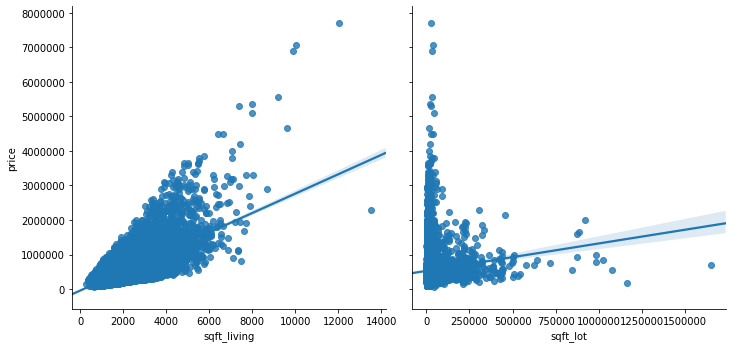

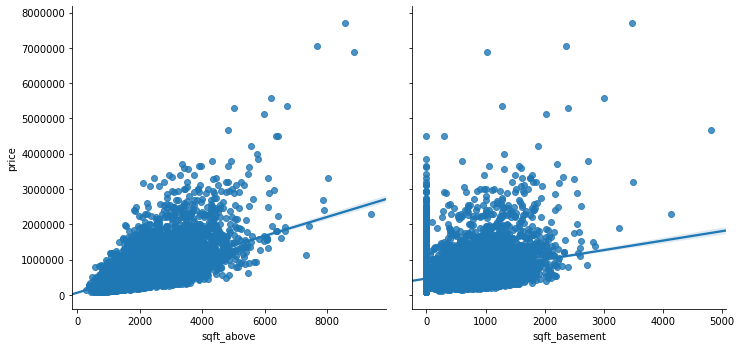

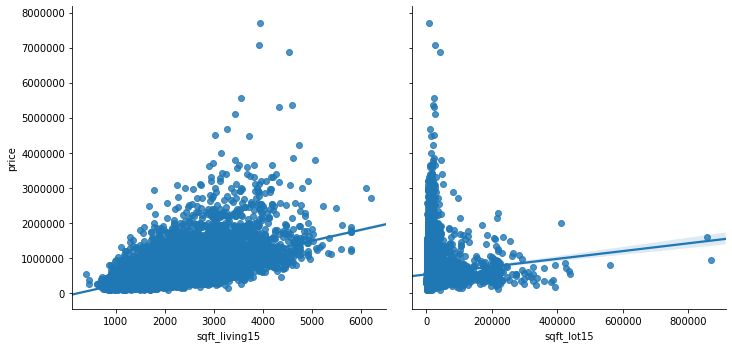

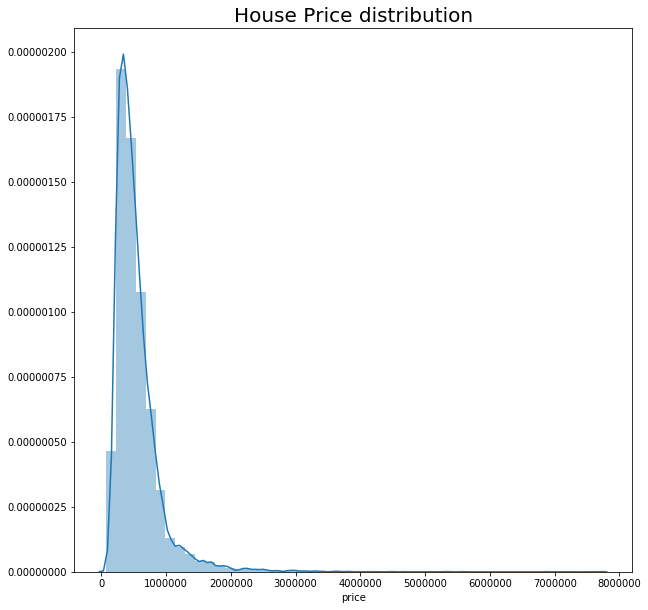

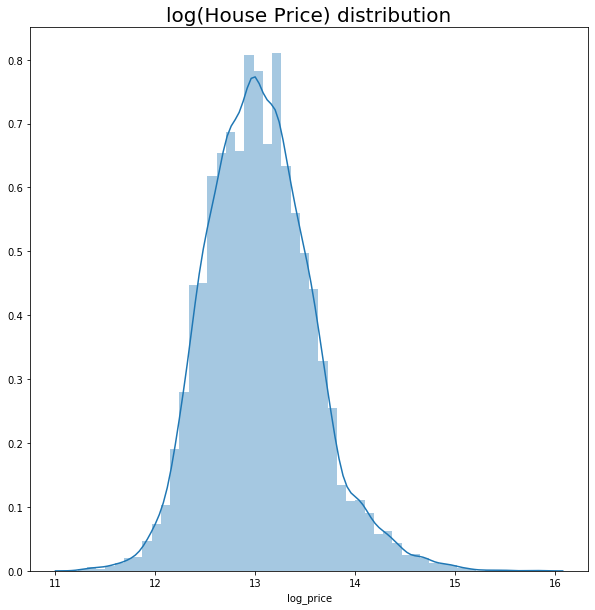

In [74]:
###########################
####Transformations

grid_plot1= sns.PairGrid(kc_house_data, y_vars=["price"], x_vars=["sqft_living", "sqft_lot"], height=5)
grid_plot1.map(sns.regplot)

grid_plot2 = sns.PairGrid(kc_house_data, y_vars=["price"], x_vars=["sqft_above", "sqft_basement"], height=5)
grid_plot2.map(sns.regplot)

grid_plot3 = sns.PairGrid(kc_house_data, y_vars=["price"], x_vars=["sqft_living15","sqft_lot15"], height=5)
grid_plot3.map(sns.regplot)

#Histogram on target variable
plt.figure(figsize=(10,10))
sns.distplot(kc_house_data["price"])
plt.title('House Price distribution', fontsize=20)

#Log tranformation
kc_house_data["log_price"]=np.log(kc_house_data["price"])
plt.figure(figsize=(10,10))
sns.distplot(kc_house_data["log_price"])
plt.title('log(House Price) distribution', fontsize=20)

###Model building after Transformations
#Defining X data
X = kc_house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = kc_house_data['log_price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import sklearn 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X_train, y_train)

#Coefficients and Intercept
print(model_1.intercept_)
print(model_1.coef_)

#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model_1.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model_1.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#RMSE
print("RMSE on Train data : ", round(math.sqrt(np.mean(np.abs(y_train - y_pred_train)**2)),2))
print("RMSE on Test data : ", round(math.sqrt(np.mean(np.abs(y_test - y_pred_test)**2)),2))

## Credit Risk (Class Imbalance) Cont'd

In [3]:
################################
#####Dealing with Class imbalance
################################

import pandas as pd
credit_risk_data = pd.read_csv(r'Datasets/loans_data/credit_risk_data_v1.csv')

print("Actual Data :", credit_risk_data.shape)

#Frequency count on target column
print("Overall Data")
freq=credit_risk_data['Bad'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
credit_risk_class0 = credit_risk_data[credit_risk_data['Bad'] == 0]
credit_risk_class1 = credit_risk_data[credit_risk_data['Bad'] == 1]

print("Class0 Actual :", credit_risk_class0.shape)
print("Class1 Actual  :", credit_risk_class1.shape)

Actual Data : (150008, 10)
Overall Data
0    139981
1     10027
Name: Bad, dtype: int64
0    93.31569
1     6.68431
Name: Bad, dtype: float64
Class0 Actual : (139981, 10)
Class1 Actual  : (10027, 10)


In [4]:
##Undersampling of claa-0
## Consider half of class-0
credit_risk_class0_under = credit_risk_class0.sample(int(0.5*len(credit_risk_class0)))
print("Class0 Undersample :", credit_risk_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by four times
credit_risk_class1_over = credit_risk_class1.sample(4*len(credit_risk_class1),replace=True)
print("Class1 Oversample :", credit_risk_class1_over.shape)

#Concatenate to create the final balanced data
credit_risk_balanced=pd.concat([credit_risk_class0_under,credit_risk_class1_over])
print("Final Balanced Data :", credit_risk_balanced.shape)

#Frequency count on target column in the balanced data
print("Balanced Data")
freq=credit_risk_balanced['Bad'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#All the datasets and their shapes
print("Actual Data :", credit_risk_data.shape)
print("Class0 Actual :", credit_risk_class0.shape)
print("Class1 Actual  :", credit_risk_class1.shape)
print("Class0 Undersample :", credit_risk_class0_under.shape)
print("Class1 Oversample :", credit_risk_class1_over.shape)
print("Final Balannced Data :", credit_risk_balanced.shape)

Class0 Undersample : (69990, 10)
Class1 Oversample : (40108, 10)
Final Balanced Data : (110098, 10)
Balanced Data
0    69990
1    40108
Name: Bad, dtype: int64
0    63.570637
1    36.429363
Name: Bad, dtype: float64
Actual Data : (150008, 10)
Class0 Actual : (139981, 10)
Class1 Actual  : (10027, 10)
Class0 Undersample : (69990, 10)
Class1 Oversample : (40108, 10)
Final Balannced Data : (110098, 10)


In [5]:
#Model building on balanced data

#Defining X data
X = credit_risk_balanced[['Credit_Limit', 'Late_Payments_Count',
       'Card_Utilization_Percent', 'Age', 'Debt_to_income_ratio',
       'Monthly_Income', 'Num_loans_personal_loans', 'Family_dependents']]

y = credit_risk_balanced['Bad']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#Building the model
from sklearn.linear_model import LogisticRegression
model_2= LogisticRegression(solver='lbfgs')
model_2.fit(X_train,y_train)

#Coefficients and Intercept
print(model_2.intercept_)
print(model_2.coef_)


(88078, 8)
(88078,)
(22020, 8)
(22020,)
[-0.02002909]
[[-6.60653525e-05  7.46201420e-01  1.84059655e-02 -3.30634422e-02
   2.77471024e-02  1.37665685e-05  1.50992622e-01  1.13201686e-01]]


In [6]:
##Confusion Matrix Calculation on Train data

from sklearn.metrics import confusion_matrix

y_pred_train=model_2.predict(X_train)
cm1 = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix  on Train Data")
print(cm1)

##Accuracy on Train data
accuracy1=(cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
print("Accuracy on Train data ",accuracy1)

#Sensitivity and Specificity on Train data
Sensitivity1=cm1[0,0]/(cm1[0,0]+cm1[0,1])
print("Sensitivity Train data ", round(Sensitivity1,3))

Specificity1=cm1[1,1]/(cm1[1,0]+cm1[1,1])
print("Specificity Train data ",round(Specificity1,3))

Confusion Matrix  on Train Data
[[47921  8052]
 [13803 18302]]
Accuracy on Train data  0.7518676627534685
Sensitivity Train data  0.856
Specificity Train data  0.57


In [7]:
##Confusion matrix on test data
y_pred_test=model_2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix  on Test Data")
print(cm2)

#####Accuracy on Test data
accuracy2=(cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1])
print("Accuracy on Test data ", accuracy2)

#Sensitivity and Specificity on Test data
Sensitivity2=cm2[0,0]/(cm2[0,0]+cm2[0,1])
print("Sensitivity Test data ",round(Sensitivity2,3))

#Specificity
Specificity2=cm2[1,1]/(cm2[1,0]+cm2[1,1])
print("Specificity Test data ", round(Specificity2,3))

Confusion Matrix  on Test Data
[[12039  1978]
 [ 3448  4555]]
Accuracy on Test data  0.7535876475930972
Sensitivity Test data  0.859
Specificity Test data  0.569
